## Question 1 ( Part 1 ):
## (Please Wait 2 to 3 minutes for it to run) ##
Libraries used: **kornia, torch, matplotlib**

Steps to find the edge of the picture:

- Smoothing the image and filtering with x and y gradient
- Finding the magnitude and direction of the gradient
- But here we do one with thresholding the gradient magnitude and one without thresholding

In [1]:
# Without Thresholding the gradient magnitude
# Steps Taken: 1. Smoothing the Image  2. Calculating the Gradient Magnitude and Orientation(Without Threshold) 3. Non Max Suppression
import kornia
import torch
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def nms(grad_mag, grad_ori):
    h, w = grad_mag.shape[-2:]
    suppressed_mag = grad_mag.clone()

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            dir_vec = torch.stack([torch.cos(grad_ori[0, 0, i, j]),
                                   torch.sin(grad_ori[0, 0, i, j])])

            pos_neigh = (i + dir_vec[0].item(), j + dir_vec[1].item())
            neg_neigh = (i - dir_vec[0].item(), j - dir_vec[1].item())

            central_val = grad_mag[0, 0, i, j]
            pos_neigh_val = grad_mag[0, 0, int(pos_neigh[0]), int(pos_neigh[1])]
            neg_neigh_val = grad_mag[0, 0, int(neg_neigh[0]), int(neg_neigh[1])]

            if central_val < pos_neigh_val or central_val < neg_neigh_val:
                suppressed_mag[0, 0, i, j] = 0.0

    return suppressed_mag

def MyCanny(img, sigma):
    image = mpimg.imread(img)
    img_tensor = kornia.image_to_tensor(image).float() 
    img_tensor = img_tensor.unsqueeze(0)
    
    gray_img_tensor = kornia.color.rgb_to_grayscale(img_tensor)
    filtered_img = kornia.filters.gaussian_blur2d(gray_img_tensor, (3, 3), (sigma, sigma))

    sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32)
    sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32)

    grad_x = torch.nn.functional.conv2d(filtered_img, sobel_x.unsqueeze(0).unsqueeze(0))
    grad_y = torch.nn.functional.conv2d(filtered_img, sobel_y.unsqueeze(0).unsqueeze(0))

    grad_mag = torch.sqrt(grad_x**2 + grad_y**2)
    grad_ori = torch.atan2(grad_y, grad_x)
    
    grad_mag_suppressed = nms(grad_mag, grad_ori)

    return grad_mag_suppressed



## Question 1 ( Part 1 No Thresholding ):
- First Test Case 

C:\Users\Rocky\anaconda3\envs\cvlab_env\lib\site-packages\kornia\utils\image.py:40: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:178.)
  tensor: Tensor = torch.from_numpy(image)


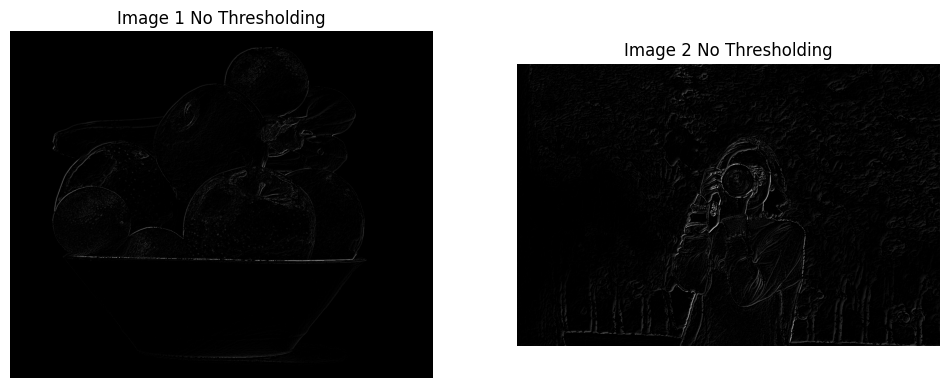

In [2]:
img_path1 = "bowl-of-fruit.jpg"
img_path2 = "free-images.jpg"
sigma = 2.0

canny_result1 = MyCanny(img_path1, sigma)
canny_result2 = MyCanny(img_path2, sigma)



fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(canny_result1.squeeze().numpy(), cmap='gray')
axes[0].axis('off')  
axes[0].set_title('Image 1 No Thresholding')

axes[1].imshow(canny_result2.squeeze().numpy(), cmap='gray')
axes[1].axis('off') 
axes[1].set_title('Image 2 No Thresholding')

plt.show()


In [4]:
# With Thresholding the gradient magnitude
# Steps Taken: 1. Smoothing the Image  2. Calculating the Gradient Magnitude and Orientation(With Threshold) 3. Non Max Suppression
import kornia
import torch
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


def nms(grad_mag, grad_ori):
    h, w = grad_mag.shape[-2:]
    suppressed_mag = grad_mag.clone()

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            dir_vec = torch.stack([torch.cos(grad_ori[0, 0, i, j]),
                                   torch.sin(grad_ori[0, 0, i, j])])

            pos_neigh = (i + dir_vec[0].item(), j + dir_vec[1].item())
            neg_neigh = (i - dir_vec[0].item(), j - dir_vec[1].item())

            central_val = grad_mag[0, 0, i, j]
            pos_neigh_val = grad_mag[0, 0, int(pos_neigh[0]), int(pos_neigh[1])]
            neg_neigh_val = grad_mag[0, 0, int(neg_neigh[0]), int(neg_neigh[1])]

            if central_val < pos_neigh_val or central_val < neg_neigh_val:
                suppressed_mag[0, 0, i, j] = 0.0

    return suppressed_mag

def MyCanny2(img, sigma, thr):
    image = mpimg.imread(img)
    img_tensor = kornia.image_to_tensor(image).float() 
    img_tensor = img_tensor.unsqueeze(0)
    
    gray_img_tensor = kornia.color.rgb_to_grayscale(img_tensor)
    filtered_img = kornia.filters.gaussian_blur2d(gray_img_tensor, (3, 3), (sigma, sigma))

    sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32)
    sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32)

    grad_x = torch.nn.functional.conv2d(filtered_img, sobel_x.unsqueeze(0).unsqueeze(0))
    grad_y = torch.nn.functional.conv2d(filtered_img, sobel_y.unsqueeze(0).unsqueeze(0))

    grad_mag = torch.sqrt(grad_x**2 + grad_y**2)
    grad_mag_thr = (grad_mag > thr).float() * thr
    grad_ori = torch.atan2(grad_y, grad_x)
    
    grad_mag_suppressed = nms(grad_mag_thr, grad_ori)

    return grad_mag_suppressed



## Question 1 ( Part 1 With Thresholding ):
- Second Test Case 

In [ ]:
img_path1 = "bowl-of-fruit.jpg"
img_path2 = "free-images.jpg"
sigma = 2.0
Threshold = 47.0
canny_result1 = MyCanny2(img_path1, sigma, Threshold)
canny_result2 = MyCanny2(img_path2, sigma, Threshold)



fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(canny_result1.squeeze().numpy(), cmap='gray')
axes[0].axis('off') 
axes[0].set_title('Image 1 with Thresholding')

axes[1].imshow(canny_result2.squeeze().numpy(), cmap='gray')
axes[1].axis('off') 
axes[1].set_title('Image 2 with Thresholding')

plt.show()


## Question 1 ( Part 2 ):
- Third Test Casee

In [ ]:
import kornia
import torch
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def nms(grad_mag, grad_ori):
    h, w = grad_mag.shape[-2:]
    suppressed_mag = grad_mag.clone()

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            dir_vec = torch.stack([torch.cos(grad_ori[0, 0, i, j]),
                                   torch.sin(grad_ori[0, 0, i, j])])

            pos_neigh = (i + dir_vec[0].item(), j + dir_vec[1].item())
            neg_neigh = (i - dir_vec[0].item(), j - dir_vec[1].item())

            central_val = grad_mag[0, 0, i, j]
            pos_neigh_val = grad_mag[0, 0, int(pos_neigh[0]), int(pos_neigh[1])]
            neg_neigh_val = grad_mag[0, 0, int(neg_neigh[0]), int(neg_neigh[1])]

            if central_val < pos_neigh_val or central_val < neg_neigh_val:
                suppressed_mag[0, 0, i, j] = 0.0

    return suppressed_mag

def hysteresis_thresholding(suppressed_mag, low_thr, high_thr):
    strong_edges = (suppressed_mag > high_thr).float()
    weak_edges = ((suppressed_mag >= low_thr) & (suppressed_mag <= high_thr)).float()

    connected_edges = torch.nn.functional.conv2d(weak_edges, torch.ones(1, 1, 3, 3), padding=1)
    strong_edges += (connected_edges > 0).float() * weak_edges

    return strong_edges

def MyCannyFull(img, sigma, low_thr, high_thr):
    image = mpimg.imread(img)
    img_tensor = kornia.image_to_tensor(image).float() 
    img_tensor = img_tensor.unsqueeze(0)

    gray_img_tensor = kornia.color.rgb_to_grayscale(img_tensor)
    filtered_img = kornia.filters.gaussian_blur2d(gray_img_tensor, (3, 3), (sigma, sigma))

    x_kernel = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32)
    y_kernel = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32)

    grad_x = torch.nn.functional.conv2d(filtered_img, x_kernel.unsqueeze(0).unsqueeze(0))
    grad_y = torch.nn.functional.conv2d(filtered_img, y_kernel.unsqueeze(0).unsqueeze(0))

    grad_mag = torch.sqrt(grad_x**2 + grad_y**2)
    grad_ori = torch.atan2(grad_y, grad_x)
    
    suppressed_mag = nms(grad_mag, grad_ori)

    result_img = hysteresis_thresholding(suppressed_mag, low_thr, high_thr)

    return result_img


In [ ]:
img_path1 = "bowl-of-fruit.jpg"
img_path2 = "free-images.jpg"
sigma = 1.0
low_threshold = 17.0
high_threshold = 37.0
canny_result1 = MyCannyFull(img_path1, sigma, low_threshold, high_threshold)
canny_result2 = MyCannyFull(img_path2, sigma, low_threshold, high_threshold)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(canny_result1.squeeze().numpy(), cmap='gray')
axes[0].axis('off')  
axes[0].set_title('Image 1 with Hysteresis Thresholding')

axes[1].imshow(canny_result2.squeeze().numpy(), cmap='gray')
axes[1].axis('off')  
axes[1].set_title('Image 2 with Hysteresis Thresholding')

plt.show()

## Question 2: ##
- Seam Carving First one is deleteting one seam from the original picture to see how the algorithm works
- This one iterates through it once and then stops and takes about 2 min to run I tried to do it for more but was unable to do so. I hope you found these instructions helpful in understanding my code, and I am sorry for not being able to fully implement this.

In [4]:
import kornia
import torch
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


def calculate_energy_map(image_tensor):

    image = mpimg.imread(image_path)
    image_tensor = kornia.image_to_tensor(image).float()
    image_tensor = image_tensor.unsqueeze(0)

    x_kernel = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32)
    y_kernel = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32)

    gray_img_tensor1 = image_tensor[:, 0, :, :]
    gray_img_tensor2 = image_tensor[:, 1, :, :]
    gray_img_tensor3 = image_tensor[:, 2, :, :]


    grad_x = torch.nn.functional.conv2d(gray_img_tensor1, x_kernel.unsqueeze(0).unsqueeze(0),padding=1)
    grad_y = torch.nn.functional.conv2d(gray_img_tensor1, y_kernel.unsqueeze(0).unsqueeze(0),padding=1)

    grad_xx = torch.nn.functional.conv2d(gray_img_tensor2, x_kernel.unsqueeze(0).unsqueeze(0), padding=1)
    grad_yy = torch.nn.functional.conv2d(gray_img_tensor2, y_kernel.unsqueeze(0).unsqueeze(0), padding=1)

    grad_xxx = torch.nn.functional.conv2d(gray_img_tensor3, x_kernel.unsqueeze(0).unsqueeze(0), padding=1)
    grad_yyy = torch.nn.functional.conv2d(gray_img_tensor3, y_kernel.unsqueeze(0).unsqueeze(0), padding=1)

    grad_mag = torch.sqrt(grad_x**2 + grad_y**2)
    grad_mag2 = torch.sqrt(grad_xx**2 + grad_yy**2)
    grad_mag3 = torch.sqrt(grad_xxx**2 + grad_yyy**2)

    result = grad_mag + grad_mag2 + grad_mag3
    return result
    
def custom_min(a, b, c):
    if a <= b and a <= c:
        return a
    elif b <= a and b <= c:
        return b
    else:
        return c
        
def remove_seam(img_tensor, seam):

    image = mpimg.imread(image_path)
    img_tensor = kornia.image_to_tensor(image).float()

    if img_tensor.size(0) == 1:
        img_tensor = K.color.bgr_to_rgb(img_tensor)

    _, height, width= img_tensor.shape

    new_img = img_tensor[:, :, :-1]
    for row in range(height):
        col_to_remove = seam[row]
        new_img[:, row, :] = torch.cat([img_tensor[:, row, :col_to_remove], img_tensor[:, row, col_to_remove + 1:]], dim=1)
    return new_img
    
def MySeamCarving(img, width, height):
    
    energy_map = calculate_energy_map(img)

    M = torch.zeros_like(energy_map)
    M = M.squeeze()
    energy_map = energy_map.squeeze()
    M[0, :] = energy_map[0, :]
    

    for row in range(1, height):
        for col in range(width):
   
            minimum_value = energy_map[row, col] +custom_min(
                M[row-1, col-1] if col-1 >= 0 else float('inf'), 
                M[row-1, col],
                M[row-1, col+1] if col+1 < width else float('inf') 
            )
            M[row, col] = minimum_value

 
    min_bottom_value, min_bottom_col = torch.min(M[height-1, :], dim=0)
    optimal_seam_bottom = min_bottom_col.item()

    optimal_seam = [optimal_seam_bottom]
    for row in range(height-2, -1, -1):
        current_col = optimal_seam[-1]
        top_col = current_col - 1 if current_col - 1 >= 0 else current_col
        bottom_col = current_col + 1 if current_col + 1 < width else current_col
        
        min_value, min_col = torch.min(M[row, top_col:bottom_col+1], dim=0)
        optimal_seam.append(top_col + min_col.item())
    
    optimal_seam.reverse()
    
    return M, optimal_seam


    


## Please Run this script to get the image ##

torch.Size([3, 1151, 1727])
The difference is in their width removing one seam
torch.Size([1151, 1728])


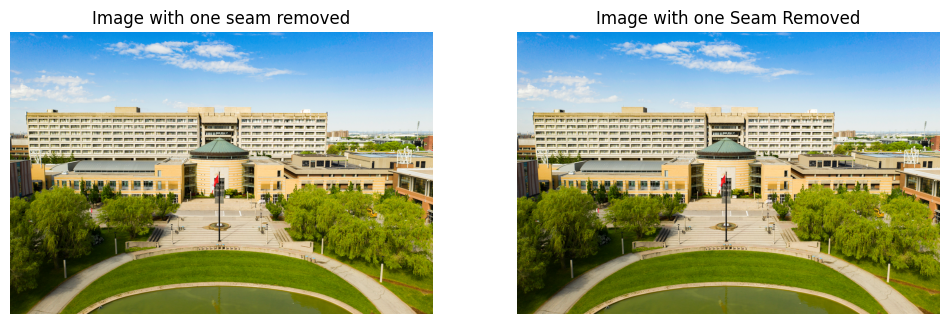

In [7]:
image_path = 'York.jpg'
M, optimal_seam = MySeamCarving(image_path, 1728, 1151)
new_img = remove_seam(image_path, optimal_seam)
print(new_img.shape)
print('The difference is in their width removing one seam')
print(M.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

original_image = mpimg.imread(image_path)
ax1.imshow(original_image)
ax1.set_title('Image with one seam removed')
ax1.set_axis_off()

new_image_np = kornia.tensor_to_image(new_img.byte()) 
ax2.imshow(new_image_np)
ax2.set_title('Image with one Seam Removed')
ax2.set_axis_off()
plt.show()



torch.Size([3, 800, 1199])
The difference is in their width removing one seam
torch.Size([800, 1200])


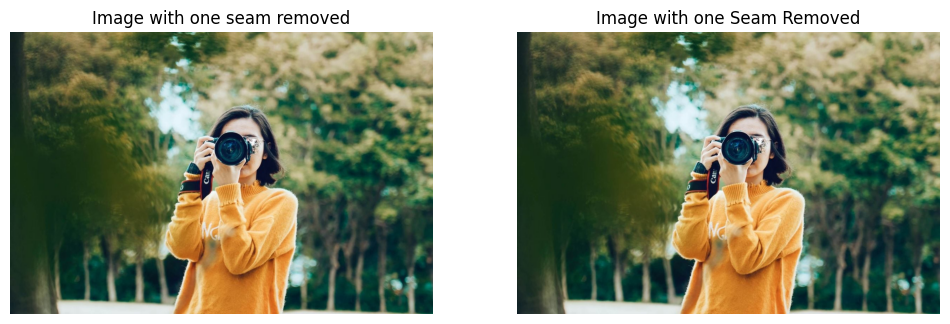

In [8]:
image_path = 'free-images.jpg'
M, optimal_seam = MySeamCarving(image_path, 1200, 800)
new_img = remove_seam(image_path, optimal_seam)
print(new_img.shape)
print('The difference is in their width removing one seam')
print(M.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

original_image = mpimg.imread(image_path)
ax1.imshow(original_image)
ax1.set_title('Image with one seam removed')
ax1.set_axis_off()

new_image_np = kornia.tensor_to_image(new_img.byte()) 
ax2.imshow(new_image_np)
ax2.set_title('Image with one Seam Removed')
ax2.set_axis_off()
plt.show()

## Continued ##
- This script is for running it until it reaches the desired output but as I said it took a long time for it to run.


In [ ]:
image_path = "York.jpg"
original_image = mpimg.imread(image_path)

initial_width, initial_height = original_image.shape[1], original_image.shape[0]
print(original_image.shape[1])
print(original_image.shape[2])
target_width, target_height = 720, 1728

while initial_width > target_width or initial_height > target_height:

    energy_map = calculate_energy_map(original_image)
    M, optimal_seam = MySeamCarving(energy_map, initial_width, initial_height)
    original_image = remove_seam(original_image, optimal_seam)

    # Update dimensions
    initial_width -= 1 


plt.imshow(original_image)
plt.title('Resized Image')
plt.show()